In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv("C:/Users/USER/Desktop/PYTHON/multivariable/glass.csv")

In [3]:
data.head()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
2,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
3,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
4,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


# Q3 : Construct the decision rules for classifying the types of glass using
* Classification Tree
* LDA
* QDA
* Nearest Neighbor
* Logistic discrimination

# 資料觀察

In [4]:
data.columns

Index(['refractive index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron', 'glass'],
      dtype='object')

## 各種類比例

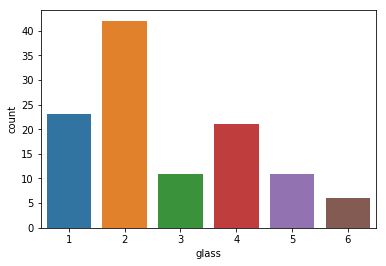

In [5]:
sn.countplot(data["glass"])

# pair plot

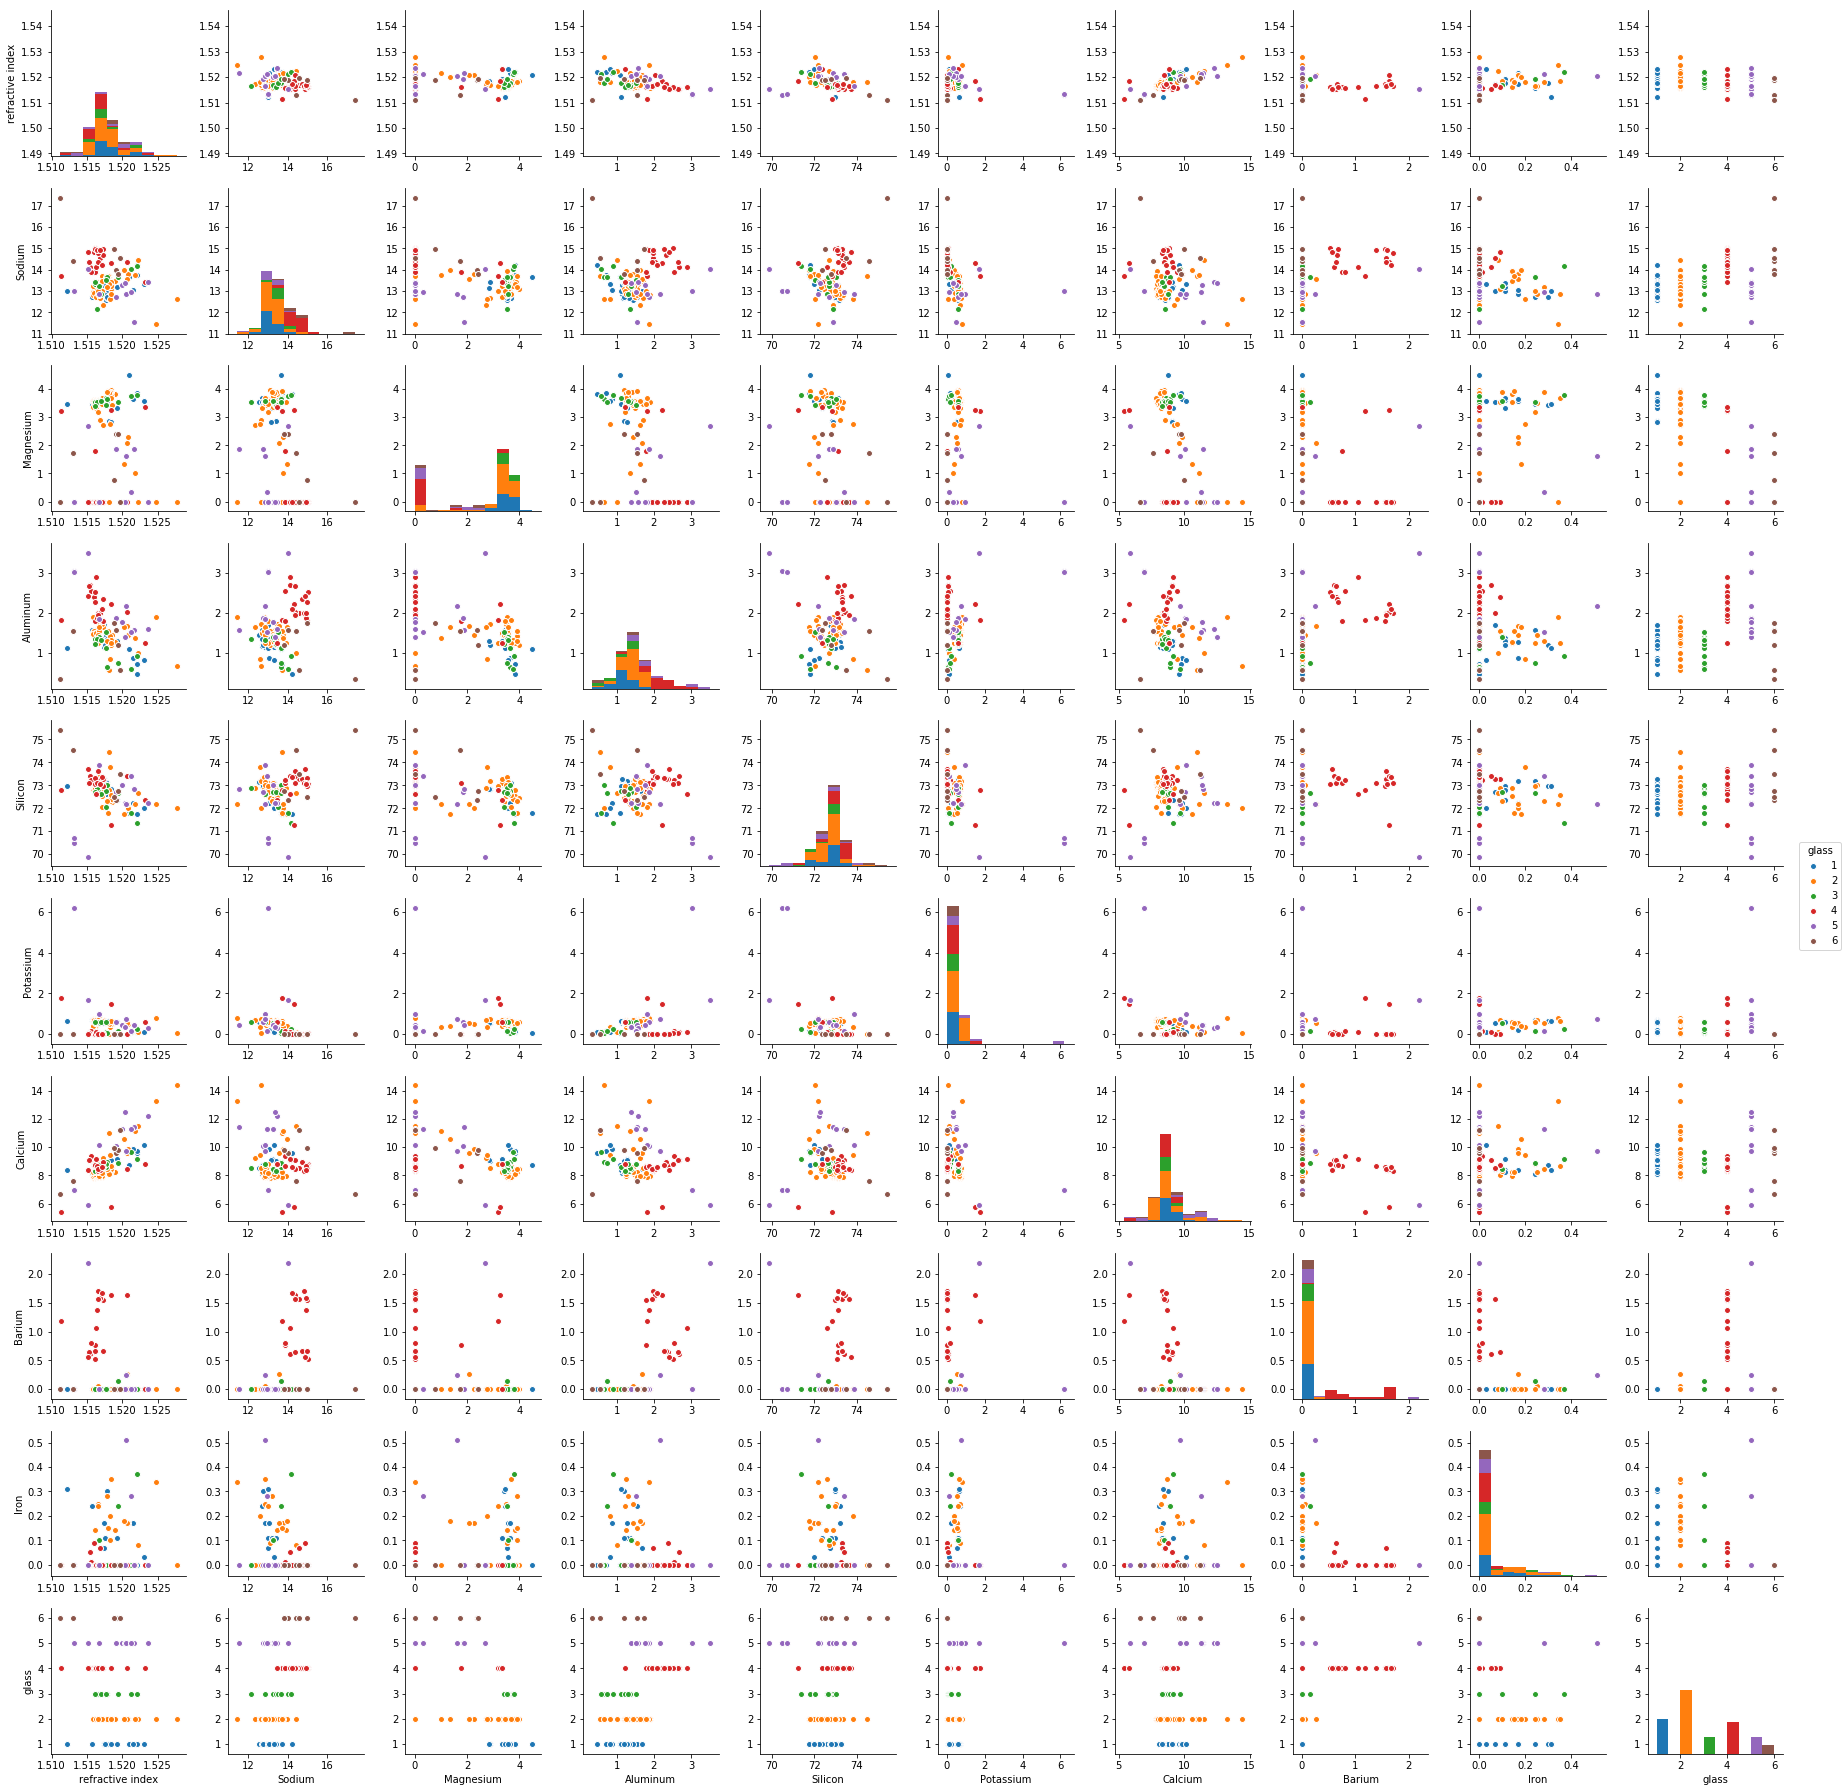

In [6]:
plt.figure(figsize=(100,100))
sn.pairplot(data,hue = "glass")

# 相關係數矩陣

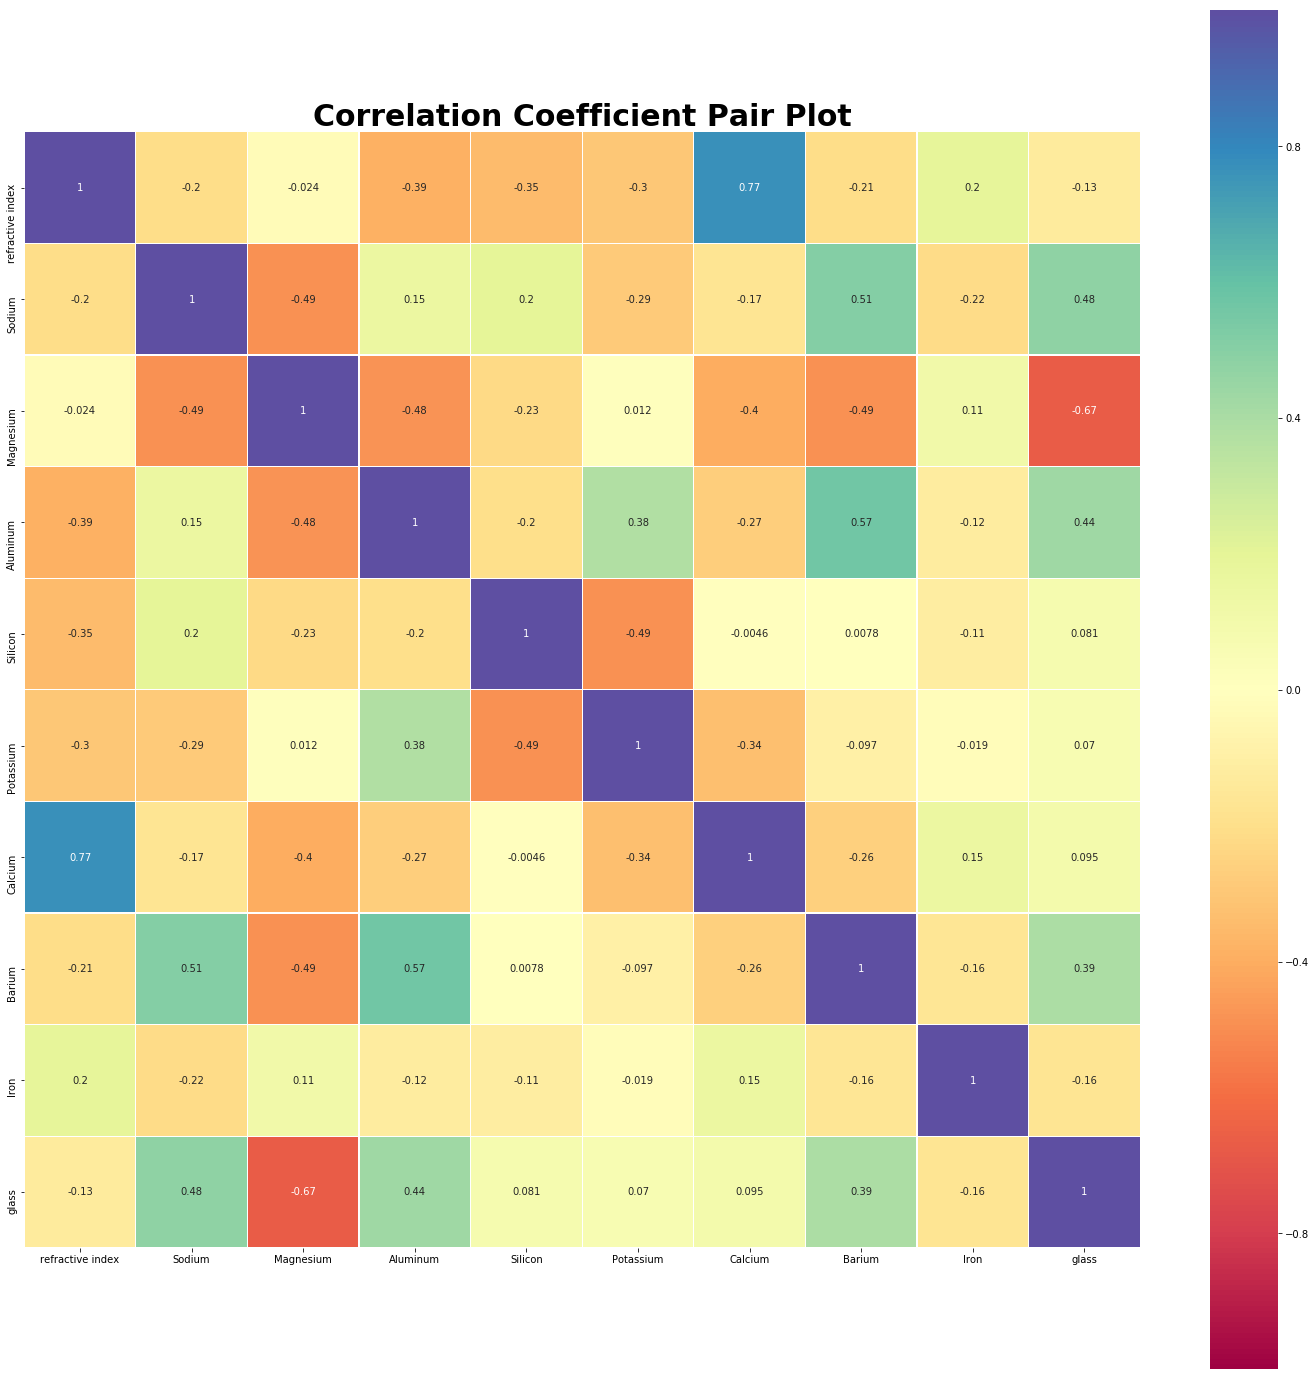

In [7]:
plt.figure(figsize=(25,25))
ax = plt.axes()
corr =data[data.columns].corr()
sn.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Correlation Coefficient Pair Plot',fontweight="bold", size=30)
plt.show()

# 切分資料成訓練 , 測試集

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = data[['refractive index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron']]

y = data['glass']

In [10]:
x_train , x_test , y_train , y_test = train_test_split(x,y)

# 定義Confusion Matrix

In [77]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

tree = DecisionTreeClassifier(criterion = "entropy" , splitter = "best" , max_features= "sqrt" , max_depth = None , 
                              min_samples_leaf = 2 , min_samples_split = 3)
tree.fit(x_train,y_train)
tree_pred = tree.predict(x_test)
#測試集準確度
accuracy_score(y_pred=tree_pred,y_true=y_test)

0.7241379310344828

In [13]:
#訓練集準確度
accuracy_score(y_pred=tree.predict(x_train),y_true=y_train)

0.8705882352941177

Confusion matrix, without normalization
[[4 1 0 0 0 0]
 [1 4 3 0 1 0]
 [1 0 1 0 0 0]
 [0 0 0 8 0 0]
 [0 0 0 0 2 0]
 [0 1 0 0 0 2]]


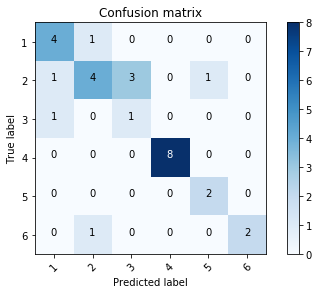

In [78]:
decision_tree_matrix = confusion_matrix(y_pred=tree_pred,y_true=y_test)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(decision_tree_matrix, classes=[1,2,3,4,5,6],
                      title='Confusion matrix')


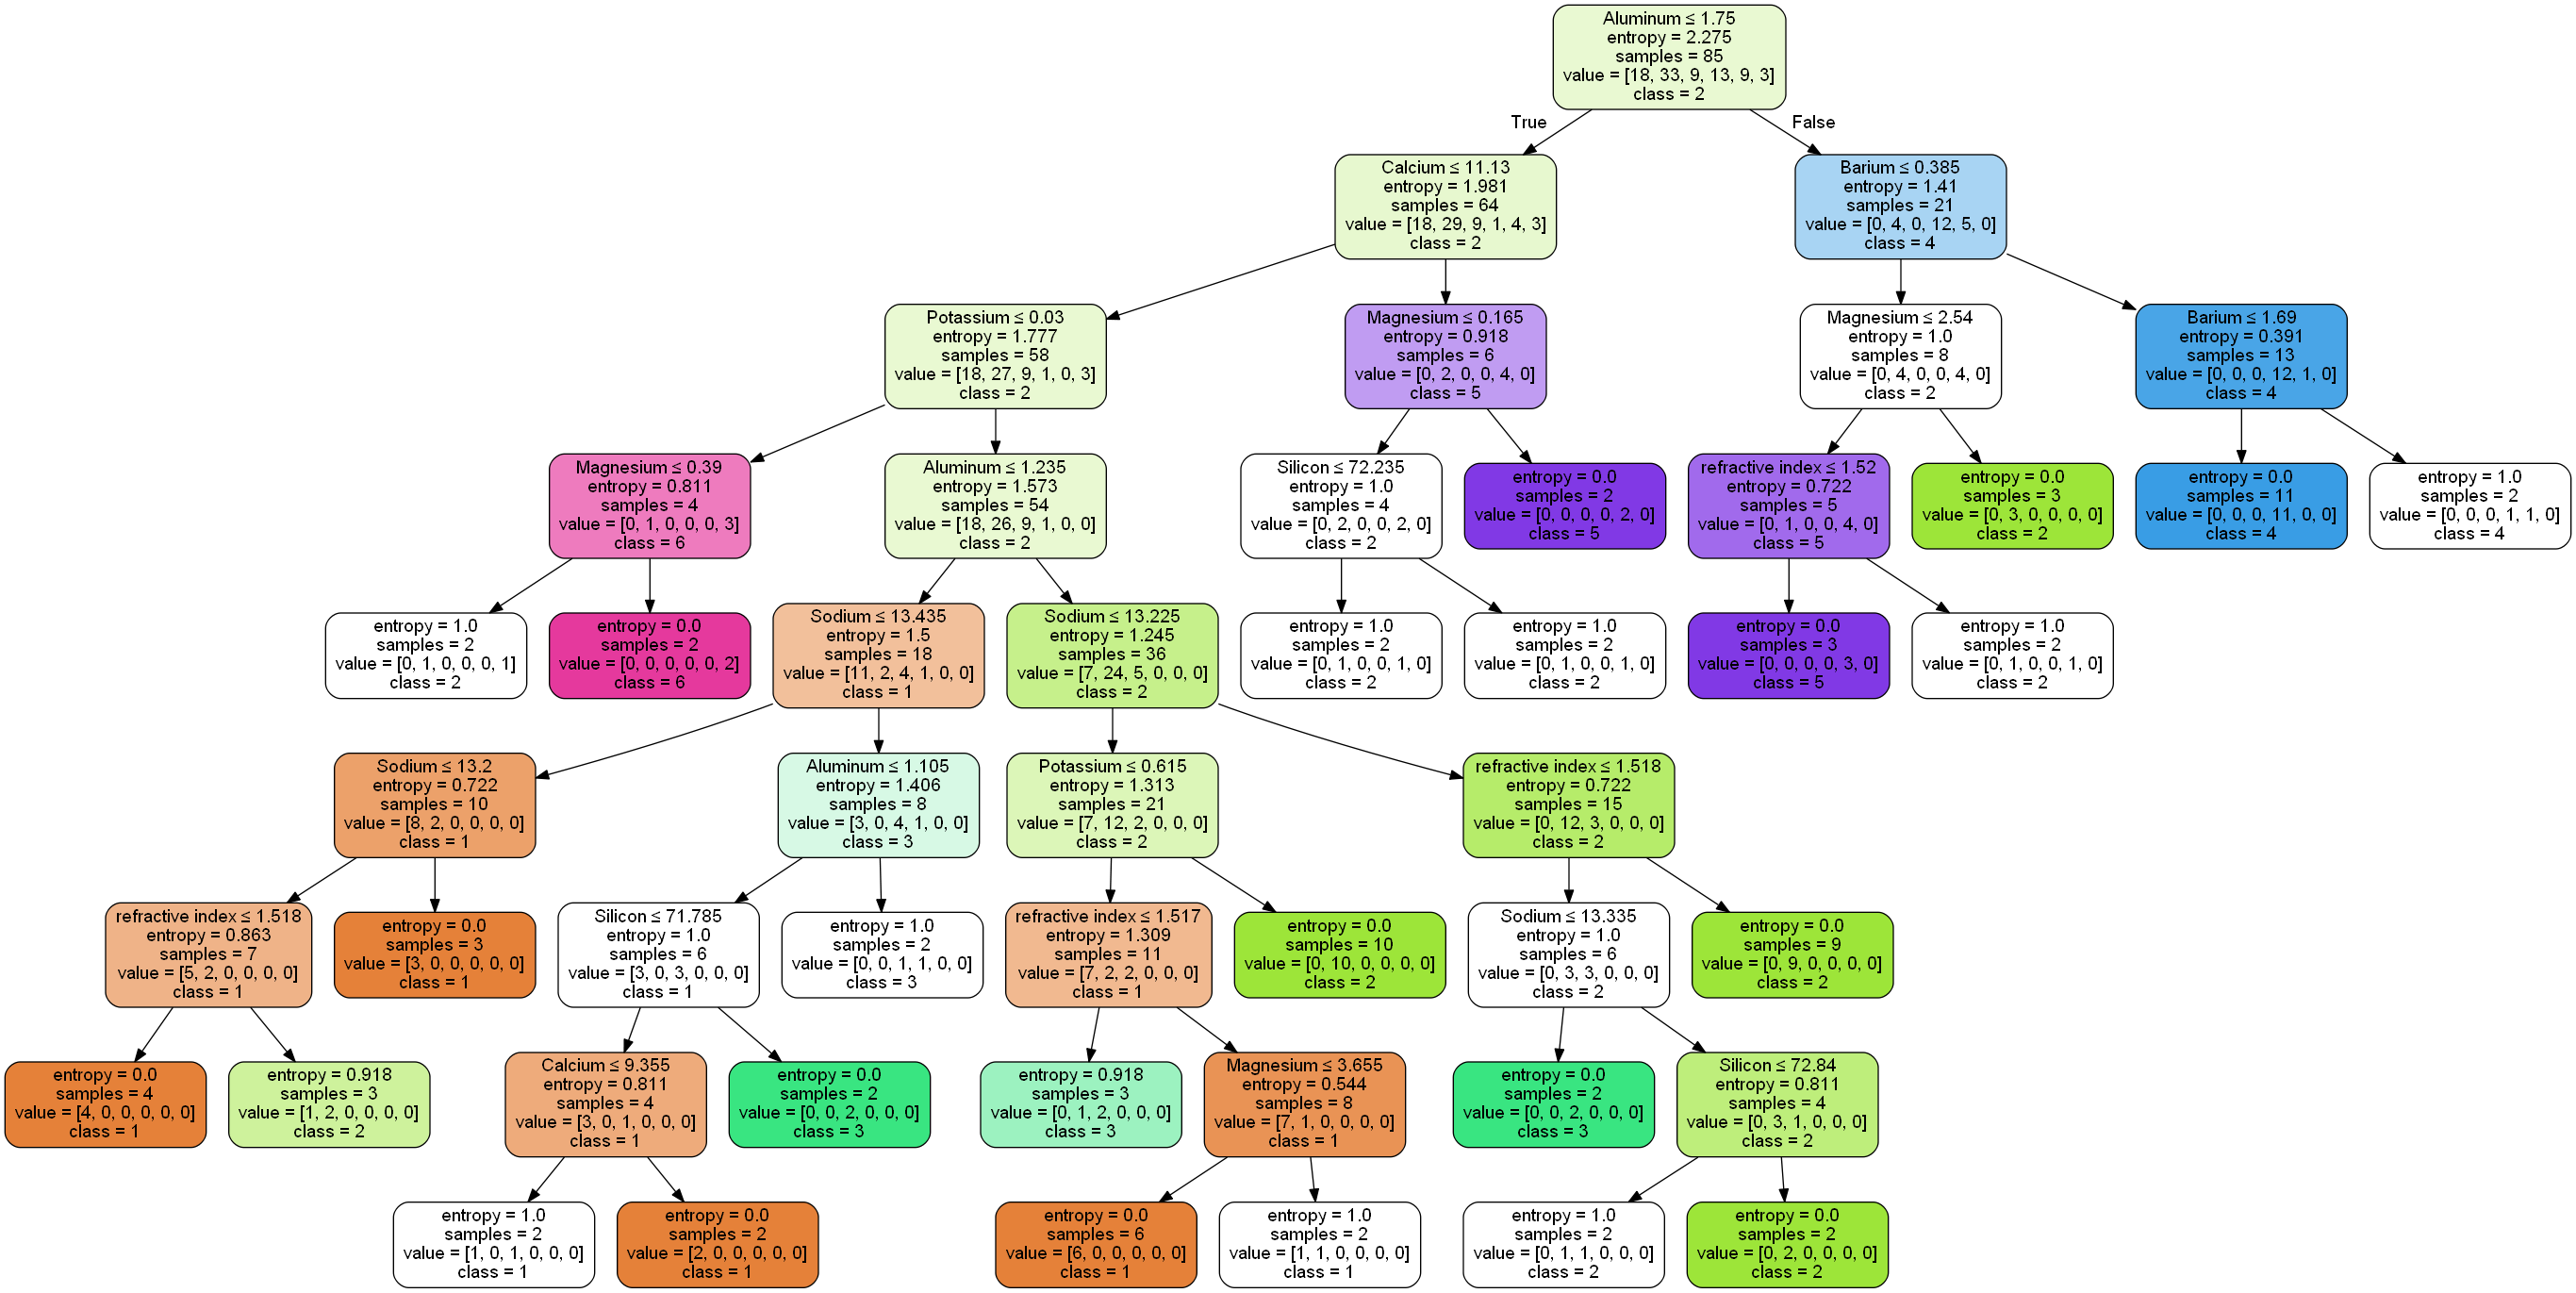

In [14]:
from sklearn.tree import export_graphviz
import pydotplus  
from IPython.display import Image  

dot_data = export_graphviz(tree, out_file=None, feature_names=['refractive index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron'], class_names=["1","2","3","4","5","6"], filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  


# LDA

## 從相關係數矩陣來看 應該是沒有存在線性相依

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [16]:
std = StandardScaler(copy=True)
std1 = StandardScaler(copy=True)
x_train_std = std.fit_transform(x_train)
x_test_std = std1.fit_transform(x_test)

In [17]:
#有標準化
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_std,y_train)
lda_pred = lda.predict(x_test_std)
accuracy_score(y_pred=lda_pred,y_true=y_test)

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


0.5862068965517241

In [18]:
#沒標準化
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda_pred = lda.predict(x_test)
accuracy_score(y_pred=lda_pred,y_true=y_test)

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


0.7586206896551724

Confusion matrix, without normalization
[[3 2 0 0 0 0]
 [1 8 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 8 0 0]
 [0 1 0 0 1 0]
 [0 2 0 0 0 1]]


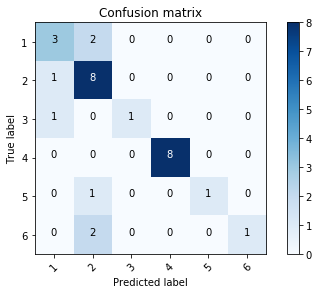

In [79]:
lda_matrix = confusion_matrix(y_pred=lda_pred,y_true=y_test)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(lda_matrix, classes=[1,2,3,4,5,6],
                      title='Confusion matrix')

## 標準化後結果沒有比較好

# QDA

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train_std,y_train)
qda_pred = qda.predict(x_test_std)
accuracy_score(y_pred = qda_pred , y_true=y_test)


D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.5862068965517241

Confusion matrix, without normalization
[[0 5 0 0 0 0]
 [0 9 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 0 8 0 0]
 [0 2 0 0 0 0]
 [0 3 0 0 0 0]]


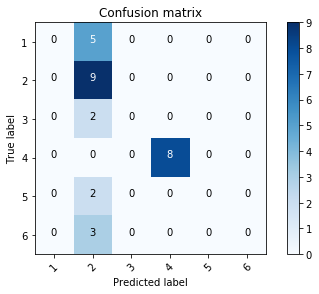

In [80]:
qda_matrix = confusion_matrix(y_pred=qda_pred,y_true=y_test)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(qda_matrix, classes=[1,2,3,4,5,6],
                      title='Confusion matrix')

# Nearest Neighbor

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
nn = KNeighborsClassifier(n_neighbors=10,weights="distance",algorithm="auto")

In [22]:
nn.fit(x_train,y_train)
pred_nn = nn.predict(x_test)
accuracy_score(y_pred=pred_nn,y_true=y_test)

0.6206896551724138

# Logistic discrimination

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log = LogisticRegression(multi_class="multinomial",solver="lbfgs",)
log.fit(x_train,y_train)
pred_log = log.predict(x_test)
accuracy_score(y_pred=pred_log,y_true=y_test)

0.6896551724137931

In [25]:
accuracy_score(y_pred=log.predict(x_train),y_true=y_train)

0.6352941176470588

Confusion matrix, without normalization
[[2 3 0 0 0 0]
 [0 9 0 0 0 0]
 [1 1 0 0 0 0]
 [0 0 0 8 0 0]
 [0 1 0 0 1 0]
 [0 2 0 1 0 0]]


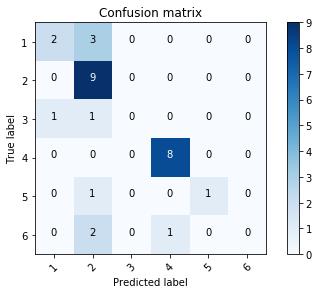

In [81]:
logist_matrix = confusion_matrix(y_pred=pred_log,y_true=y_test)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(logist_matrix, classes=[1,2,3,4,5,6],
                      title='Confusion matrix')

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
forest = RandomForestClassifier(criterion='entropy', 
                             n_estimators=1000,
                             min_samples_split=3,
                             min_samples_leaf=2,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 
forest.fit(x_train,y_train)
pre_forest = forest.predict(x_test)

accuracy_score(y_pred=pre_forest , y_true=y_test)

0.7931034482758621

In [28]:
accuracy_score(y_pred=forest.predict(x_train),y_true=y_train)

1.0

Confusion matrix, without normalization
[[2 3 0 0 0 0]
 [1 8 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 8 0 0]
 [0 0 0 0 2 0]
 [0 2 0 0 0 1]]


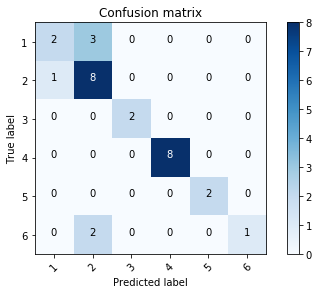

In [82]:
forest_matrix = confusion_matrix(y_pred=pre_forest,y_true=y_test)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(forest_matrix, classes=[1,2,3,4,5,6],
                      title='Confusion matrix')

# AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
ada = AdaBoostClassifier(DecisionTreeClassifier(criterion = "entropy" , splitter = "best" , max_features= "sqrt" , max_depth = None , 
                              min_samples_leaf = 2 , min_samples_split = 3),n_estimators=50,learning_rate=1,algorithm="SAMME")

In [70]:
ada.fit(x_train,y_train)
pred_ada = ada.predict(x_test)
accuracy_score(y_pred=pred_ada,y_true=y_test)

0.8275862068965517

In [71]:
accuracy_score(y_pred=ada.predict(x_train),y_true=y_train)

1.0

Confusion matrix, without normalization
[[3 2 0 0 0 0]
 [0 9 0 0 0 0]
 [0 1 1 0 0 0]
 [0 0 0 8 0 0]
 [0 0 0 0 2 0]
 [0 2 0 0 0 1]]


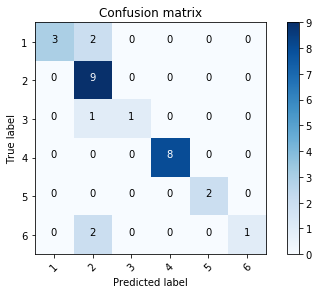

In [84]:
ada_matrix = confusion_matrix(y_pred=pred_ada,y_true=y_test)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(ada_matrix, classes=[1,2,3,4,5,6],
                      title='Confusion matrix')

## adaboost > random forest > decision tree